In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
#extraemos los datos del fichero
datos_coche = pd.read_csv("auto.csv")
# Eliminamos los datos que no estén bien definidos
datos_coche = datos_coche.dropna()
#Para realizar el algoritmo de forma correcta y evitar el overfitting,
# lo dividimos en train y test y no hay que ordenarlos de forma aleatoria ya que 
# no depende el orden en este caso.

datos_train = datos_coche.sample(frac=0.8, random_state=0)
datos_test = datos_coche.drop(datos_train.index)
datos_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
9,8,390.0,190.0,3850.0,8.5,70,1,15.0
25,8,360.0,215.0,4615.0,14.0,70,1,10.0
28,8,304.0,193.0,4732.0,18.5,70,1,9.0
31,4,113.0,95.0,2228.0,14.0,71,3,25.0
32,6,232.0,100.0,2634.0,13.0,71,1,19.0
...,...,...,...,...,...,...,...,...
364,4,112.0,88.0,2395.0,18.0,82,1,34.0
369,4,105.0,74.0,1980.0,15.3,82,2,36.0
376,4,108.0,70.0,2245.0,16.9,82,3,34.0
378,4,91.0,67.0,1965.0,15.7,82,3,32.0


In [7]:
# separamos las variables de la variable objetivo para entrenarlos
datos_sep_train = datos_train.pop("mpg")
datos_sep_test = datos_test.pop("mpg")
datos_sep_test

9      15.0
25     10.0
28      9.0
31     25.0
32     19.0
       ... 
364    34.0
369    36.0
376    34.0
378    32.0
390    28.0
Name: mpg, Length: 78, dtype: float64

In [9]:
#normalizamos los datos de entrada de la red para evitar el desviación en ellos a partir del conjunto de datos test
train_stats = datos_train.describe()
train_stats = train_stats.transpose()
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

norm_datos_train = norm(datos_train)
norm_datos_test = norm(datos_test)
norm_datos_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
144,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,-0.715676
280,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,-0.715676
68,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,-0.715676
372,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,-0.715676
328,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,1.781239
...,...,...,...,...,...,...,...
279,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,-0.715676
227,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,-0.715676
148,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,1.781239
143,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,1.781239


In [11]:
# definimos la red neuronal
def red():
  modelo = keras.Sequential([
                             layers.Dense(65, activation='relu',input_shape=[len(datos_train.keys())]),
                             layers.Dense(65, activation='relu'),
                             layers.Dense(1)
                             ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  modelo.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
  return modelo
red = red()

In [12]:
#entrenamiento de la red con los datos normalizados como entrada y con los datos 
entrenamiento = red.fit(norm_datos_train, datos_sep_train, epochs=1200,validation_split= 0.2,  verbose=0)


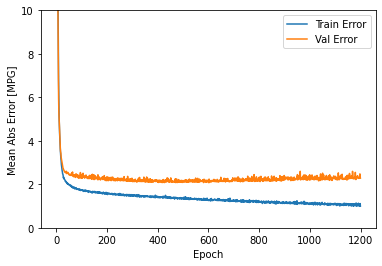

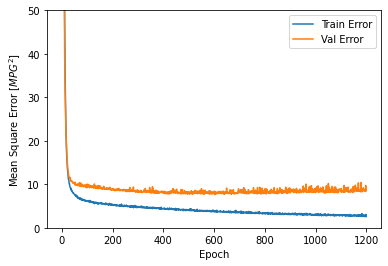

In [13]:
#Representamos el error y comprobamos el overfitting
def plot_history(entrenamiento):
  hist = pd.DataFrame(entrenamiento.history)
  hist['epoch'] = entrenamiento.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()
  plt.show()


plot_history(entrenamiento)


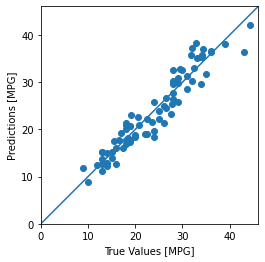

In [22]:
#realizamso las predicciones del modelo con los datos que no habiamos metido para el entreno
# y represenamos el modelo de regresión frente a los valores reales 
predicciones = red.predict(norm_datos_test).flatten()
plt.scatter(datos_sep_test, predicciones)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])


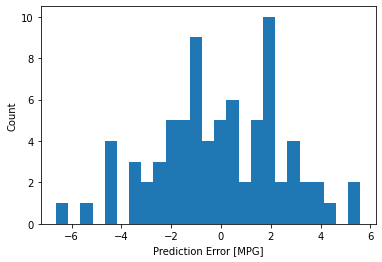

In [21]:
#Representamos el error de forma de historiograma
error = predicciones - datos_sep_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")